In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('~/Predictive_Analytics/Week2/car.csv')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [24]:
df.shape

(398, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [26]:
df.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [37]:
df['US Made'].unique()

array([1, 0])

In [32]:
df[df['Horsepower']=='?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,0
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,0
374,23.0,4,151.0,?,3035,20.5,82,1


In [30]:
np.where((df['Horsepower'] == '?') & (df['MPG'] > 30))[0]

array([330, 354])

In [33]:
df = df.drop(np.where((df['Horsepower'] == '?') & (df['MPG'] > 30))[0])

In [34]:
df.Horsepower = df.Horsepower.str.replace('?','NaN').astype(float)
df.Horsepower.fillna(df.Horsepower.mean(),inplace=True)
df.Horsepower = df.Horsepower.astype(int)

In [35]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


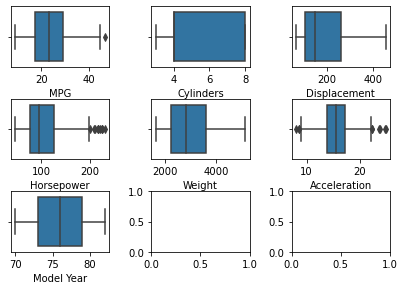

In [36]:
f, axes = plt.subplots(3, 3)
f.tight_layout()


sns.boxplot(x=df['MPG'] , ax=axes[0,0])
sns.boxplot(x=df['Cylinders'] , ax=axes[0,1])
sns.boxplot(x=df['Displacement'] , ax=axes[0,2])
sns.boxplot(x=df['Horsepower'] , ax=axes[1,0])
sns.boxplot(x=df['Weight'] , ax=axes[1,1])
sns.boxplot(x=df['Acceleration'] , ax=axes[1,2])
sns.boxplot(x=df['Model Year'] , ax=axes[2,0])

plt.show()

#### Model Building: Including all the independent variables in our first model.

In [57]:
import statsmodels.api as sm
X = df.drop('MPG',axis=1)  
y = df.MPG   
#X_scaled = preprocessing.scale(X)
#X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

X = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1927.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                   2.12e-226
Time:                        20:13:47   Log-Likelihood:                         -734.21
No. Observations:                 277   AIC:                                      1482.
Df Residuals:                     270   BIC:                                      1508.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### If we look at the summary above, the p-value of two variables is greater than 0.05. <br> The key takeways are the p-values of "Cylinders" and "Acceleration" and the coeff of "US Made" variable. The feature "US Made" has the most negative impact on mpg of a car. In our case if a car is US made, then its mpg is likely to be 2.6 mpg less than that of a comparable car.

##### We will be using the variance inflation factor to check the multi-collinearity between independent variables. If a variable has a variance inflation factor greater than 5,then it is associated with multi-collinearity. We will use the variance_inflation_factor() of statsmodels to perform this task.

In [75]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
X1 = sm.tools.add_constant(df) 
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)
series1

const           771.785157
MPG               5.661809
Cylinders        10.708404
Displacement     23.385064
Horsepower        9.446954
Weight           13.678585
Acceleration      2.551083
Model Year        2.023590
US Made           2.076274
dtype: float64

In [76]:
df_vif = df.drop(['Cylinders','Displacement','Weight'],axis=1)
X2 = sm.tools.add_constant(df_vif)
series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)
series2

const           694.881735
MPG               4.080203
Horsepower        4.286493
Acceleration      2.040779
Model Year        1.654160
US Made           1.604340
dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [85]:
X_vif = df_vif.drop('MPG',axis=1)  
y_vif = df_vif.MPG   
#X_scaled = preprocessing.scale(X)
#X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_train_vif,X_test_vif,y_train_vif,y_test_vif = train_test_split(X_vif,y_vif,test_size=.3,random_state=0)

X = sm.add_constant(X_vif)
model_vif = sm.OLS(y_train_vif, X_train_vif).fit()

In [86]:
print(model_vif.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              2579.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                   1.89e-215
Time:                        20:41:55   Log-Likelihood:                         -772.01
No. Observations:                 277   AIC:                                      1552.
Df Residuals:                     273   BIC:                                      1567.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### As per the variance inflation factor calculation. The displacement,horsepower,weight,and cylinders have a strong positive correlation between themselves and this violates the non-multi collinearity assumption of Linear regression. Multi-collinearity hinders the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

#### Let's verify our observation by using one of the optimization technique (Backward elimination) 

In [74]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"Drop {worst_feature} with {worst_pval}")
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

Drop Cylinders with 0.36401226805996023
Drop Acceleration with 0.3439001089835496


['Displacement', 'Horsepower', 'Weight', 'Model Year', 'US Made']

##### The above results show that "Cylinders" and "Acceleration" are not significant in predicting the target variable. <br> In the next steps, we will take these variables out and retrain the model.


In [83]:
df_1 = df.drop(['Cylinders','Acceleration'],axis=1)
X_opt = df_1.drop('MPG',axis=1)  
y_opt = df_1.MPG   
X_train_opt,X_test_opt,y_train_opt,y_test_opt = train_test_split(X_opt,y_opt,test_size=.3,random_state=0)

X = sm.add_constant(X_opt)
model_opt = sm.OLS(y_train_opt, X_train_opt).fit()
print(model_opt.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2690.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):                   3.01e-229
Time:                        20:40:58   Log-Likelihood:                         -735.58
No. Observations:                 277   AIC:                                      1481.
Df Residuals:                     272   BIC:                                      1499.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### The optimized model has slightly changed as the coeff of independent variables have changed but the r-squared value remains the same. <br> The coeff of "US Made" came down from -2.63 to -2.5 making this a little less impactful on mpg.

#### Out of the three models that we trained, we chose "model_opt" to predict the values of mpg on test set because the r-squared value is maximum and the coeff of "US made" feature is optimized. The graph is intented to visualize the predicted results against the original values.

In [87]:
linear_pred = model_opt.predict(X_test_opt)

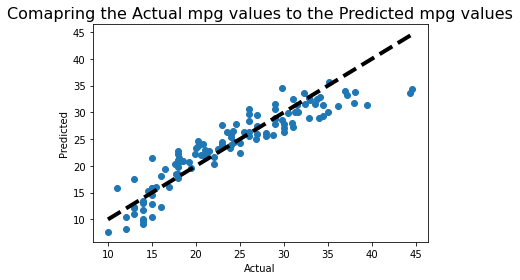

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test_opt, linear_pred)
ax.plot([y_test_opt.min(), y_test_opt.max()], [y_test_opt.min(), y_test_opt.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Comapring the Actual mpg values to the Predicted mpg values',
         fontsize=16)
plt.show()